# Demo of direct noise reduction

In [1]:
%matplotlib inline
import torch
from auxiliarFunctions import dataset_one_scan, gini_index, count_parameters
from auxiliarFunctions import imgs_w_zoom
from scriptsForFigures.scriptsImagesNoiseReduction import figureNoiseReductionCNNComparison
from scriptsForFigures.scriptsImagesNoiseReduction import figureNoiseReductionWithoutData

### Fetching CT slices

In [2]:
dataDir = "./data/slicesCT.h5"

### Loading  the trained weights to the CNNs tested in the paper

In [3]:
# Loading CNN code
from cnns.dhsn2 import dhsn2_2d
from cnns.dhsn1 import dhsn1_2d
from cnns.FBPConvNet import FBPConvNet_2d
from cnns.red import red_2d

# Instantiating networks
# DHSN2 trained without any data
dhsn2_noData = dhsn2_2d(1, 3).float().cuda()
dhsn2_noData.load_state_dict(torch.load( "./models/dhsn2_L1_noData_25.pyt" ))
dhsn2_noData.eval();

# DHSN2
dhsn2 = dhsn2_2d(1, 3).float().cuda()
dhsn2.load_state_dict(torch.load( "./models/dhsn2_L1_25.pyt" ))
dhsn2.eval();

# DHSN1
dhsn1 = dhsn1_2d(1, 3).float().cuda()
dhsn1.load_state_dict(torch.load( "./models/dhsn1_L1_25_new.pyt" ))
dhsn1.eval();

# FBPConvNet
fbp = FBPConvNet_2d(1, 3, 4).float().cuda()
fbp.load_state_dict(torch.load( "./models/fbpnet_max_L1_25.pyt" ))
fbp.eval();

# RED
red = red_2d(96).float().cuda()
red.load_state_dict(torch.load( "./models/ed_red_L1_25_new.pyt" ))
red.eval();

## Images for noise reduction experiment
This section generates and displays the images displayed in Fig. 8 of the paper

/home/s152030/NEXIS/dev/imageDenoising/TIP/DEMO/scriptsForFigures/scriptsImagesNoiseReduction.py:37: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  gradient=True, full=True)


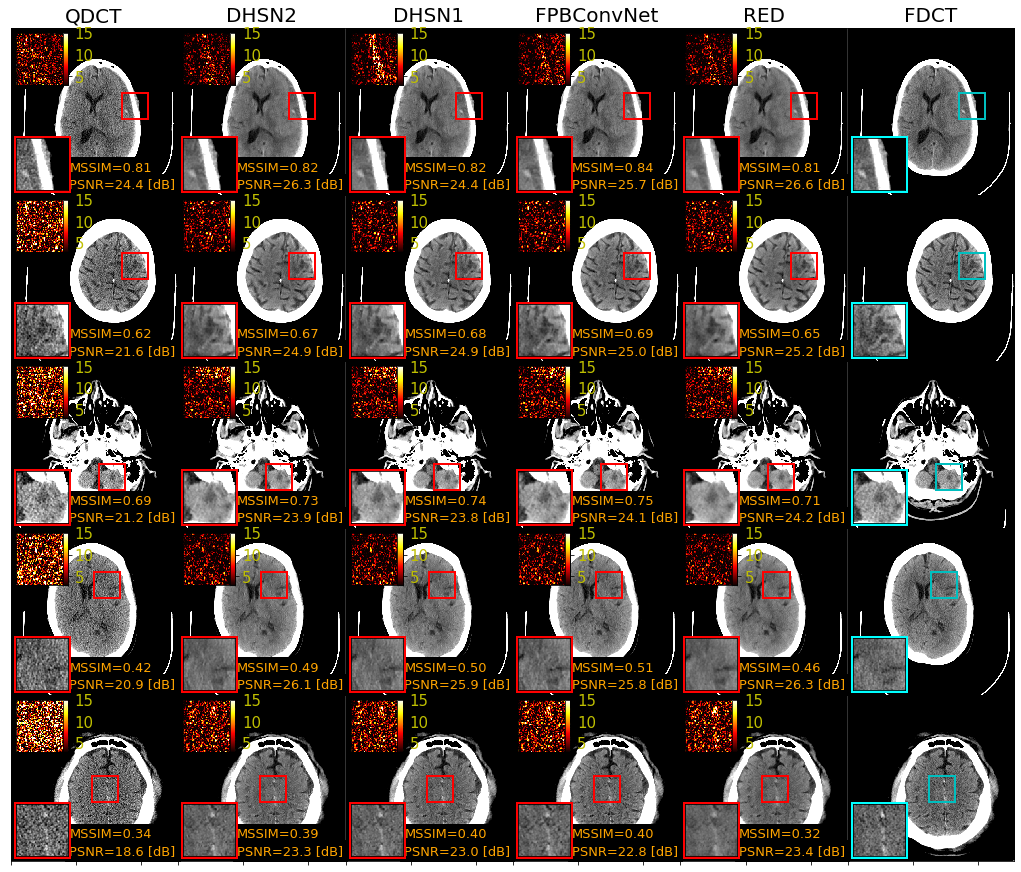

In [4]:
figureNoiseReductionCNNComparison(dataDir, dhsn2, dhsn1, fbp, red)

## Images for noise reduction without ground-truth
This section generates and displays the images displayed in Fig. 13 of the paper

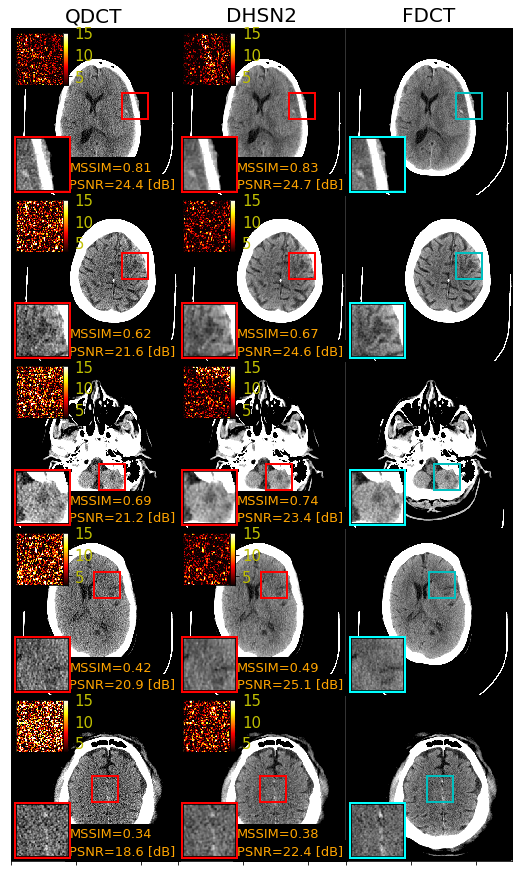

In [5]:
figureNoiseReductionWithoutData(dataDir, dhsn2_noData)